In [1]:
using PGFPlots
import HDF5, JLD
using EncounterSimulation
using EncounterModel

In [7]:
trlzero = JLD.load("../data/trlzero_lagrange_sweep_Mar-22_1930.jld")
# trl = JLD.load("../data/trlcons_lagrange_sweep_Mar-22_2245.jld")
trl = JLD.load("../data/trlcons_lagrange_sweep_Mar-23_0410.jld")
trl["risk_ratios"] = trl["risk_ratios"][1:end-1]
trl["deviations"] = trl["deviations"][1:end-1]
trl["avg_delays"] = trl["avg_delays"][1:end-1]
# turning = JLD.load("../data/turning_lagrange_sweep_Mar-22_1957.jld")
# turning["risk_ratios"] = turning["risk_ratios"][2:end]
# turning["deviations"] = turning["deviations"][2:end]
turning = JLD.load("../data/turning_lagrange_sweep_Mar-23_0419.jld")
# turning["risk_ratios"] = turning["risk_ratios"][1:end-1]
# turning["deviations"] = turning["deviations"][1:end-1]
turningpick = JLD.load("../data/turningpick_lagrange_sweep_Mar-23_1433.jld")
turning["risk_ratios"][end] = turningpick["risk_ratios"][end]
turning["deviations"][end] = turningpick["deviations"][end]
turning["avg_delays"][end] = turningpick["avg_delays"][end]
trlstatic = JLD.load("../data/D_sweep_Mar-23_0005.jld")
trlbounded = JLD.load("../data/trlbounded_lagrange_sweep_Mar-22_2307.jld")
curve_data = [
              "Directly optimized bank angle"=>turning,
              "Static TRL"=>trlstatic,
              # "Bounded Static TRL"=>trlstatic2,
              "Optimized TRL"=>trl,
              # "Bounded Optimized TRL"=>trlbounded,
              # "Optimized TRL with D=0 action"=>trlzero,
]
nothing

In [8]:
plots=Plots.Plot[]
# x_param = "avg_delays"
x_param = "deviations"
for (title,d) in curve_data
    p = Plots.Linear(d[x_param],d["risk_ratios"],legendentry=title)
    push!(plots,p)
    @show title
    @show get(d,"lambdas",nothing)
    @show get(d,"Ds",nothing)
    @show d["avg_delays"]
    @show d["deviations"]
    @show d["risk_ratios"]
end

title => "Optimized TRL"
get(d,"lambdas",nothing) => [100.0,316.2277660168379,1000.0,3162.2776601683795,9999.999999999989,31622.776601683792,100000.0]
get(d,"Ds",nothing) => nothing
d["avg_delays"] => [6.229166666666667,7.492267289174205,8.84945417618685,9.863403263403264,10.153760569648421,10.24578313253012]
d["deviations"] => [3163,3531,4028,4368,4562,4632]
d["risk_ratios"] => [0.0851,0.052,0.036,0.0296,0.0267,0.0263]
title => "Static TRL"
get(d,"lambdas",nothing) => nothing
get(d,"Ds",nothing) => [250,300,350,400,500]
d["avg_delays"] => [5.182042579450787,6.577974054650842,7.77431421446384,8.848958333333334,10.511668273866924]
d["deviations"] => [3437.0,3758.0,4126.0,4502.0,5254.0]
d["risk_ratios"] => [0.1141,0.0636,0.0434,0.03,0.0233]
title => "Directly optimized bank angle"
get(d,"lambdas",nothing) => [300,500,700,1000,2000]
get(d,"Ds",nothing) => nothing
d["avg_delays"] => [9.887942053685556,11.95227843559383,13.753806284418529,15.041361102962746,15.637124183006536]
d["deviations

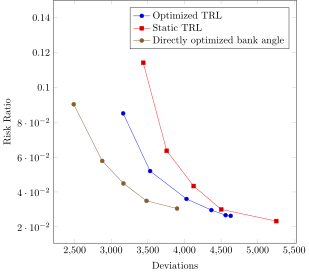

In [12]:
p = Axis(plots,
         xlabel="Deviations",
         ylabel="Risk Ratio",
         legendPos="north east",
         width="4in",
         height="4in",
ymax=.15)

In [13]:
# save("/tmp/pareto.pdf",p)
save("/home/zach/Devel/CDC_Paper/figures/pareto.pdf",p)

In [9]:
#improvement at 0.05
olrr = trl["risk_ratios"][3]
old = trl["deviations"][3]
ourr = trl["risk_ratios"][2]
oud = trl["deviations"][2]
slrr = trlstatic["risk_ratios"][3]
sld = trlstatic["deviations"][3]
surr = trlstatic["risk_ratios"][2]
sud = trlstatic["deviations"][2]
dlrr = turning["risk_ratios"][3]
dld = turning["deviations"][3]
durr = turning["risk_ratios"][2]
dud = turning["deviations"][2]
@show oid = (0.05-olrr)/(ourr-olrr)*(oud-old)+old
@show sid = (0.05-slrr)/(surr-slrr)*(sud-sld)+sld
@show did = (0.05-dlrr)/(durr-dlrr)*(dud-dld)+dld
improvement = (oid-sid)/sid
@show staticmore = (sid-did)/did
@show optmore = (oid-did)/did

oid = ((0.05 - olrr) / (ourr - olrr)) * (oud - old) + old => 3593.125
sid = ((0.05 - slrr) / (surr - slrr)) * (sud - sld) + sld => 4005.762376237624
did = ((0.05 - dlrr) / (durr - dlrr)) * (dud - dld) + dld => 3052.3488372093025
staticmore = (sid - did) / did => 0.31235405580313913
optmore = (oid - did) / did => 0.1771672215830736


0.1771672215830736

In [7]:
plots=Plots.Plot[]
x_param = "avg_delays"
# x_param = "deviations"
for (title,d) in curve_data
    p = Plots.Linear(d[x_param],d["risk_ratios"],legendentry=title)
    push!(plots,p)
end

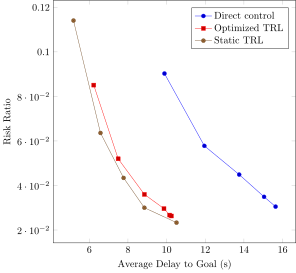

In [8]:
p = Axis(plots,
         xlabel="Average Delay to Goal (s)",
         ylabel="Risk Ratio",
         legendPos="north east",
         width="4in",
         height="4in")

In [20]:
save("/home/zach/Devel/CDC_Paper/figures/delay_pareto.pdf",p)